In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import time

In [2]:
tic = time.time()

In [3]:
flights = pd.read_csv('data/flights_clean.csv').sample(10000)
flights

,airline,day,day_of_week,departure_delay,destination_airport,destination_latitude,destination_longitude,distance,month,origin_airport,...,scheduled_arrival,scheduled_departure,scheduled_time,state_destination,state_origin,taxi_in,taxi_out,day_of_year,origin_temperature,destination_temperature
3567492,WN,29,2,2.0,MCO,28.42889,-81.31603,404,12,ATL,...,610,520,90.0,FL,GA,8.0,11.0,363,65.5,75.4
1962674,WN,26,4,-2.0,SAT,29.53369,-98.46978,192,3,HOU,...,585,530,55.0,TX,TX,5.0,7.0,85,65.4,66.5
3395537,WN,4,5,-1.0,TPA,27.97547,-82.53325,406,12,ATL,...,1135,1050,85.0,FL,GA,7.0,9.0,338,45.5,68.1
247864,UA,11,6,-5.0,DEN,39.85841,-104.66700,1199,4,ATL,...,1095,1009,206.0,CO,GA,5.0,14.0,101,66.4,52.4
358489,UA,13,3,0.0,DEN,39.85841,-104.66700,862,5,IAH,...,1364,1270,154.0,CO,TX,8.0,24.0,133,73.3,56.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3507096,B6,20,7,140.0,BOS,42.36435,-71.00518,187,12,JFK,...,666,599,67.0,MA,NY,4.0,29.0,354,39.8,35.7
2206922,NK,28,2,13.0,LAS,36.08036,-115.15233,2106,4,BWI,...,1287,1160,307.0,NV,MD,5.0,16.0,118,56.2,73.6
3057886,DL,18,5,1.0,EWR,40.69250,-74.16866,746,9,ATL,...,816,685,131.0,NJ,GA,4.0,14.0,261,73.7,74.5
3427834,EV,9,3,-7.0,LGA,40.77724,-73.87261,419,12,CLE,...,938,840,98.0,NY,OH,5.0,12.0,343,45.8,45.7


In [4]:
pre_y = flights.departure_delay

In [5]:
pre_X = flights.drop(columns=['departure_delay', 'airline', 'destination_airport',
                              'origin_airport', 'state_destination', 'state_origin'])

In [6]:
X, X_test, y, y_test = train_test_split(pre_X, pre_y)

In [7]:
scaler = StandardScaler()
scaler.fit(X)
Xstd = scaler.transform(X)

In [8]:
#Creating a range of values of the tuning parameter to visualize the lasso coefficients
#for different values of the tuning parameter
alphas = 10**np.linspace(10,-2,100)*0.1

In [9]:
#Finding the lasso coefficients for increasing values of the tuning parameter
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xstd, y)
    coefs.append(lasso.coef_)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.554e+05, tolerance: 1.011e+03
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.253e+05, tolerance: 1.011e+03
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

Text(0, 0.5, 'Standardized coefficient')

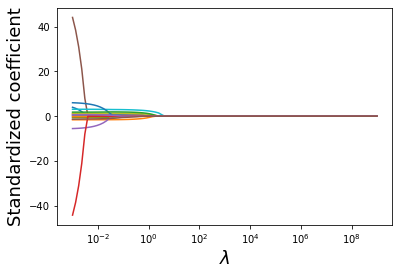

In [10]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
#plt.plot([lassocv.alpha_,lassocv.alpha_],[-0.4,0.25],':')

In [11]:
#Let us use cross validation to find the optimal value of the tuning parameter - lambda
#For the optimal lambda, the cross validation error will be the least

#Note that we are reducing the range of alpha so as to better visualize the minimum
alphas = 10**np.linspace(1,-5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(Xstd, y)

#Optimal value of the tuning parameter - lamda
lassocv.alpha_

0.2902612758047449

Text(0, 0.5, 'Cross-validation error')

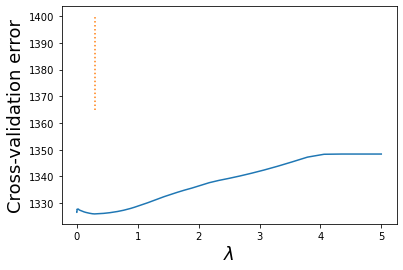

In [12]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(lassocv.alphas_,lassocv.mse_path_.mean(axis=1))
plt.plot([lassocv.alpha_,lassocv.alpha_],[1300,1400],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

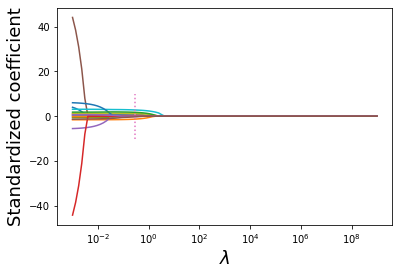

In [13]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
alphas = 10**np.linspace(10,-2,100)*0.1
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.plot([lassocv.alpha_,lassocv.alpha_],[-10,10],':')

In [14]:
Xtest_std = scaler.transform(X_test)

In [15]:
#Using the developed lasso model to predict on test data
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(Xstd, y)
pred=lasso.predict(Xtest_std)

In [16]:
#RMSE on test data
np.sqrt(((pred-y_test)**2).mean())

37.84449121694536

In [17]:
y_test.std()

38.29706385351134

In [18]:
toc = time.time()
toc - tic

55.524073123931885

In [19]:
tic_dummy = time.time()

In [20]:
flights = pd.read_csv('data/flights_clean_numerical.csv').sample(10000)
flights

,day,day_of_week,departure_delay,destination_latitude,destination_longitude,distance,month,origin_latitude,origin_longitude,scheduled_arrival,...,state_origin_SD,state_origin_TN,state_origin_TX,state_origin_UT,state_origin_VA,state_origin_VT,state_origin_WA,state_origin_WI,state_origin_WV,state_origin_WY
2312976,12,2,-5.0,32.89595,-97.03720,631,5,36.12448,-86.67818,1183,...,0,1,0,0,0,0,0,0,0,0
3378635,2,3,-4.0,28.42889,-81.31603,468,12,35.21401,-80.94313,1202,...,0,0,0,0,0,0,0,0,0,0
3707321,3,2,-9.0,41.30252,-95.89417,1037,11,33.43417,-112.00806,828,...,0,0,0,0,0,0,0,0,0,0
893592,13,4,-4.0,40.78839,-111.97777,422,8,39.49858,-119.76806,536,...,0,0,0,0,0,0,0,0,0,0
690869,12,7,-3.0,33.94254,-118.40807,954,7,47.44898,-122.30931,910,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978704,20,7,-3.0,26.68316,-80.09559,951,9,39.87195,-75.24114,771,...,0,0,0,0,0,0,0,0,0,0
2988631,7,1,90.0,36.77619,-119.71814,493,9,33.43417,-112.00806,923,...,0,0,0,0,0,0,0,0,0,0
3783387,7,7,17.0,43.13986,-89.33751,228,6,44.88055,-93.21692,859,...,0,0,0,0,0,0,0,0,0,0
3720152,8,2,-10.0,34.72940,-92.22425,374,12,29.98047,-95.33972,1354,...,0,0,1,0,0,0,0,0,0,0


In [21]:
pre_y = flights.departure_delay

In [22]:
pre_X = flights.drop(columns=['departure_delay'])

In [23]:
X, X_test, y, y_test = train_test_split(pre_X, pre_y)

In [24]:
scaler = StandardScaler()
scaler.fit(X)
Xstd = scaler.transform(X)

In [25]:
#Creating a range of values of the tuning parameter to visualize the lasso coefficients
#for different values of the tuning parameter
alphas = 10**np.linspace(10,-2,100)*0.1

In [26]:
#Finding the lasso coefficients for increasing values of the tuning parameter
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xstd, y)
    coefs.append(lasso.coef_)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.121e+03, tolerance: 1.001e+03
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.115e+03, tolerance: 1.001e+03
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

Text(0, 0.5, 'Standardized coefficient')

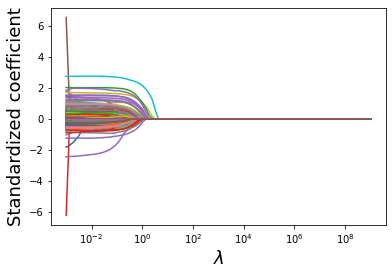

In [27]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
#plt.plot([lassocv.alpha_,lassocv.alpha_],[-0.4,0.25],':')

In [28]:
#Let us use cross validation to find the optimal value of the tuning parameter - lambda
#For the optimal lambda, the cross validation error will be the least

#Note that we are reducing the range of alpha so as to better visualize the minimum
alphas = 10**np.linspace(1,-5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(Xstd, y)

#Optimal value of the tuning parameter - lamda
lassocv.alpha_

KeyboardInterrupt: 

In [ ]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(lassocv.alphas_,lassocv.mse_path_.mean(axis=1))
plt.plot([lassocv.alpha_,lassocv.alpha_],[1365,1400],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

In [ ]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
alphas = 10**np.linspace(10,-2,100)*0.1
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.plot([lassocv.alpha_,lassocv.alpha_],[-10,10],':')

In [ ]:
Xtest_std = scaler.transform(X_test)

In [ ]:
#Using the developed lasso model to predict on test data
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(Xstd, y)
pred=lasso.predict(Xtest_std)

In [ ]:
#RMSE on test data
np.sqrt(((pred-y_test)**2).mean())

In [ ]:
y_test.std()

In [ ]:
toc_dummy = time.time()
toc_dummy - tic_dummy